<a href="https://colab.research.google.com/github/sarahkim430/Python_sideprojects/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine Quality Classification Project

*  Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests 
*   Data from: [Cortez et al., 2009](https://archive.ics.uci.edu/ml/datasets/wine+quality)

##1.Explore Data

In [30]:
#import packages 
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#import red/white wine data 
red = pd.read_csv('/content/drive/MyDrive/Colab_git/winequality-red.csv', sep=';')
white = pd.read_csv('/content/drive/MyDrive/Colab_git/winequality-white.csv', sep=';') 

In [33]:
white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [34]:
red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**Input variables (based on physicochemical tests):**  
1 - fixed acidity    
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  

**Output variable (based on sensory data):**  
12 - quality (score between 0 and 10)  

In [35]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##2.Questions 

* What characteristics of wine are most closely related to wine quality?
* Make a model that predicts wine quality.

##3.Manipulate Data

###3-1. Combine both data

In [37]:
#before combining, create a column('tag') that indicates red/white wine 
red['tag'] = 'r'
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


In [38]:
white['tag'] = 'w'
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [39]:
#combine data 
wine = pd.concat([red, white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [40]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tag                   6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


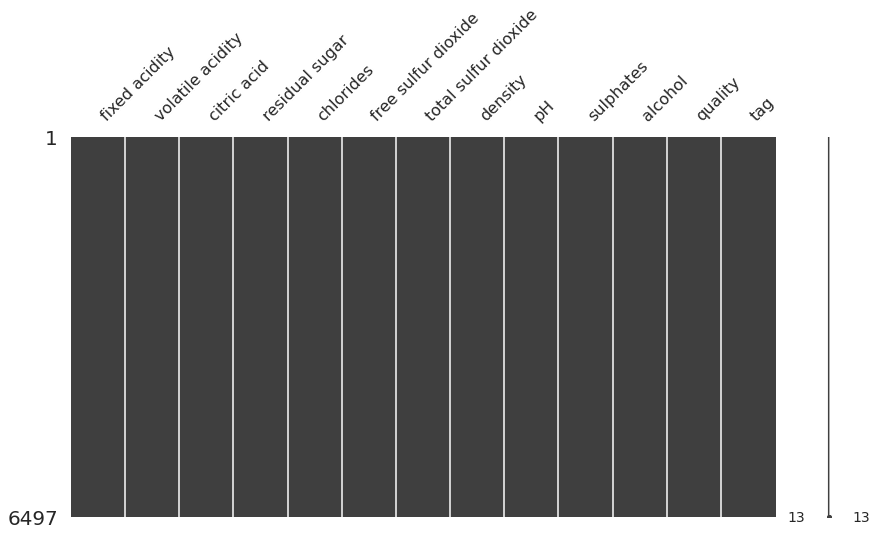

In [41]:
#check missing values 
import missingno
missingno.matrix(wine, figsize =(14,7))

##4.EDA & Visualization

###4-1. 'quality' check 

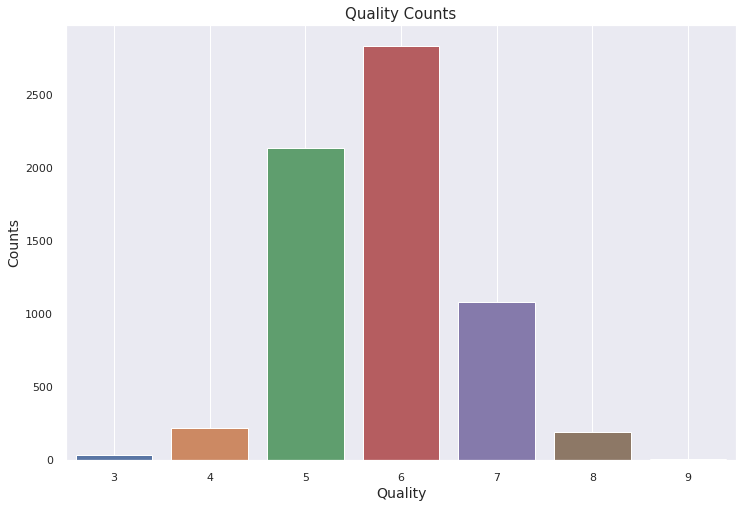

In [42]:
#plot how many wines there are for each quality score in the wine dataset
plt.figure(figsize=(12,8))
sns.countplot(data = wine ,x='quality')

plt.title("Quality Counts", fontsize=15)
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.grid()

In [43]:
##plot how many wines there are for each quality score in each red/white wine datasets
tag1 = wine.groupby(['tag'])['quality'].value_counts().unstack(0)
tag1

tag,r,w
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


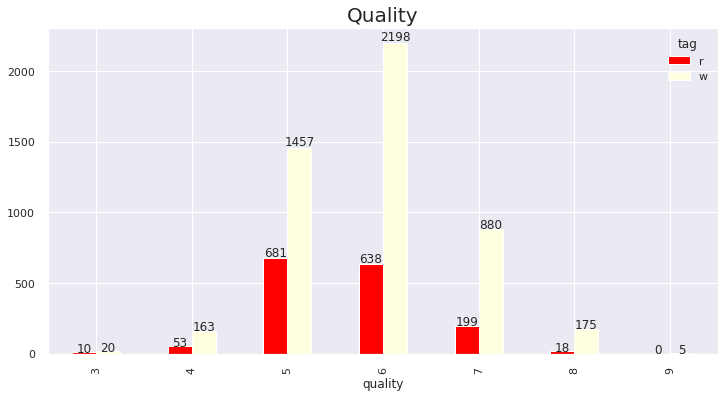

In [44]:
ax = tag1.plot(kind='bar', color=['red', 'lightyellow'] ,figsize = (12,6))

ax.set_title('Quality', size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center')

###4-2. Distribution of each column

In [45]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tag                   6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 968.6+ KB


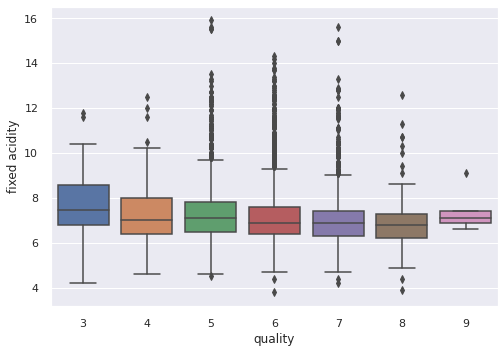

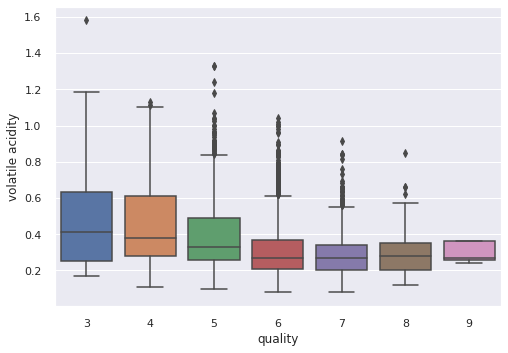

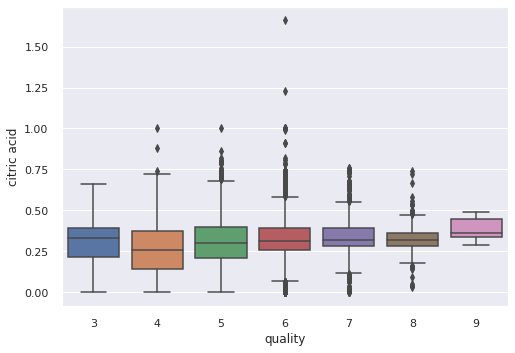

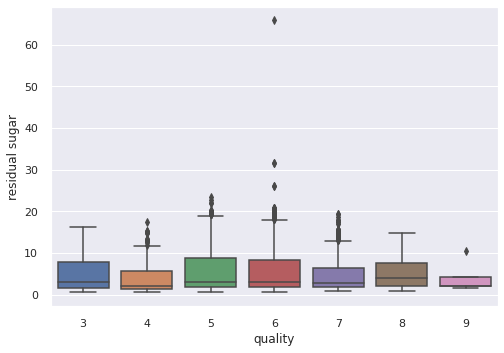

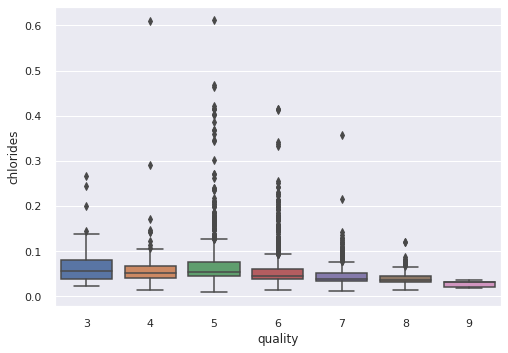

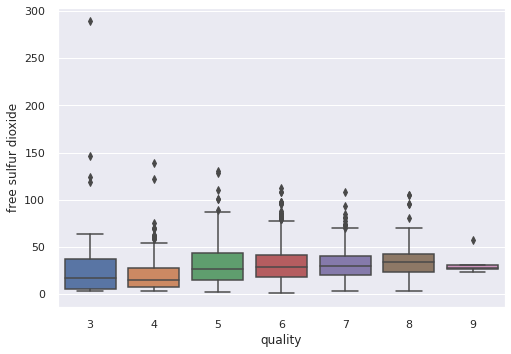

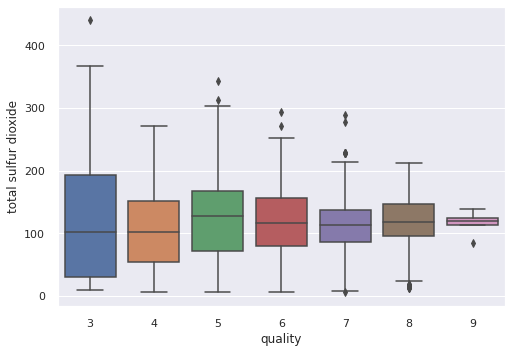

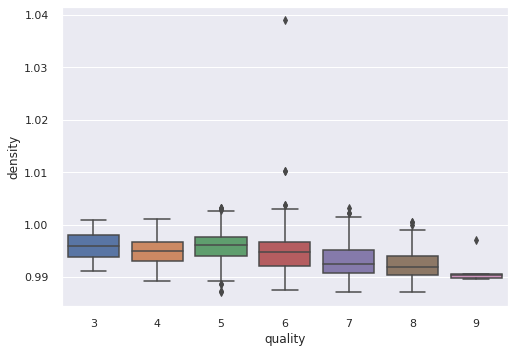

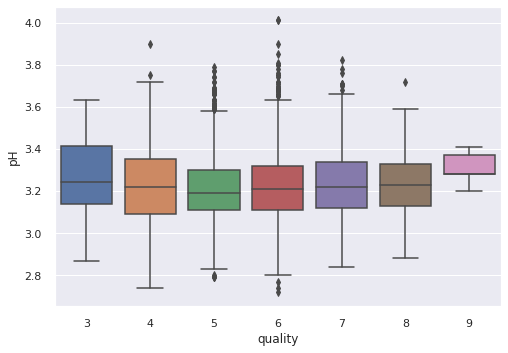

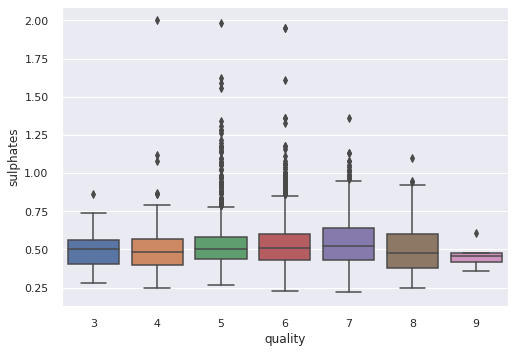

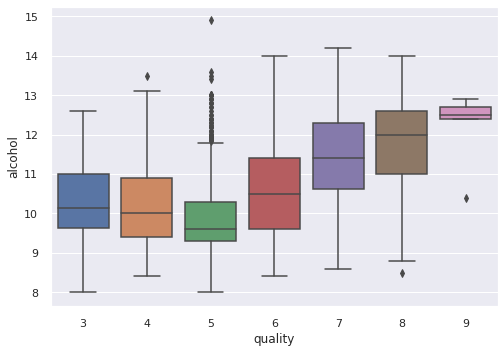

In [46]:
# box plot
for i in wine.columns:
    if i =="quality":
        break
    sns.boxplot('quality', i, data=wine)
    plt.show()

#negative correlation: volatile acidity, chlorides
#positive correlation: citric acid, alcohol

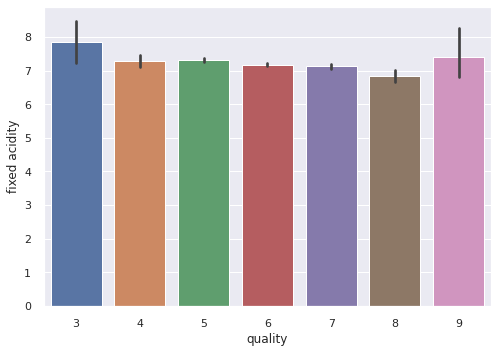

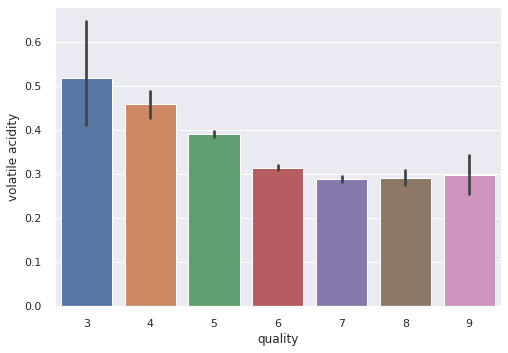

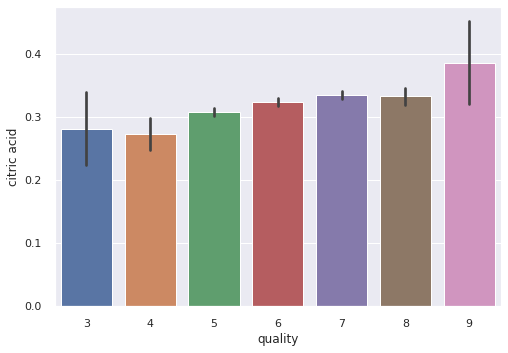

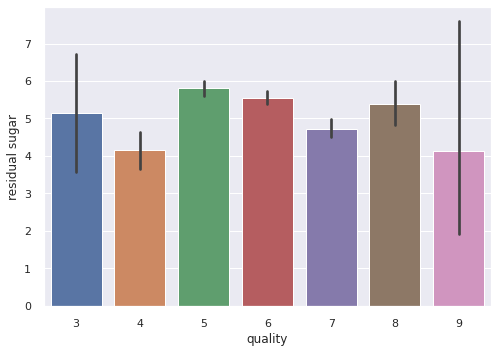

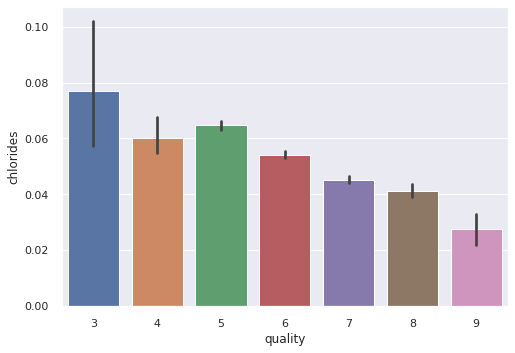

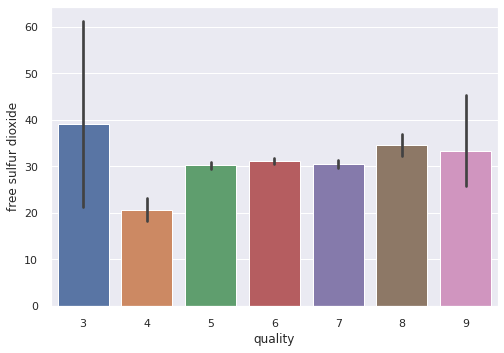

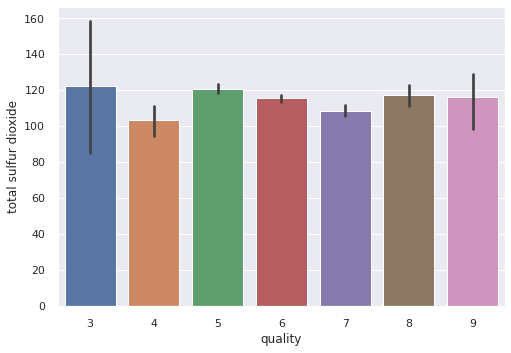

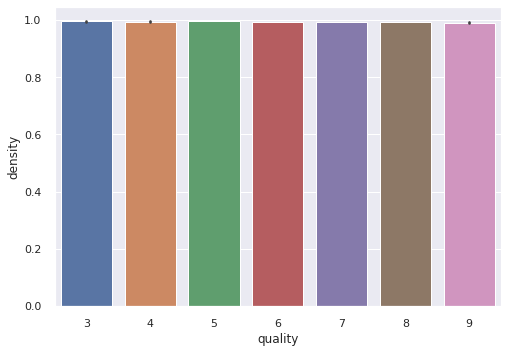

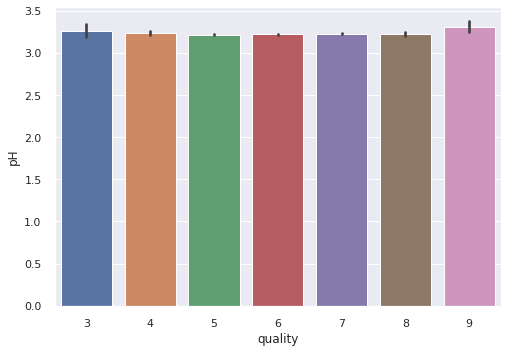

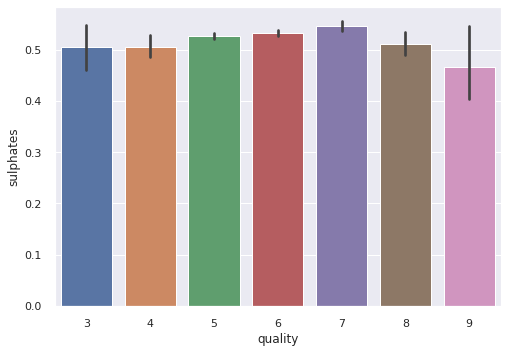

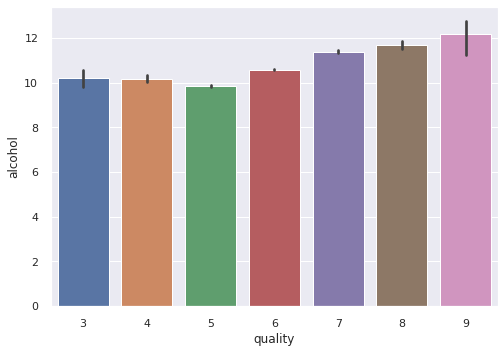

In [47]:
#bar plot
for i in wine.columns:
    if i =="quality":
        break
    sns.barplot('quality',i,data=wine)
    plt.show()

#negative correlation: volatile acidity, chlorides
#positive correlation: citric acid, alcohol

###4-3. Check correlation

Text(0.5, 1.0, 'Correlation map for Wine Data')

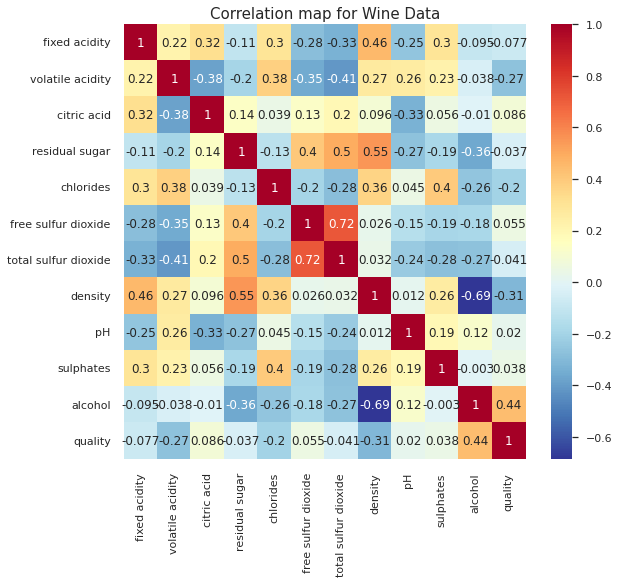

In [52]:
#heatmap
f, ax = plt.subplots(1, 1, figsize=(9, 8))

corrmat = wine.corr()
sns.heatmap(corrmat, annot=True, cmap='RdYlBu_r', ax=ax)
plt.title('Correlation map for Wine Data', size=15)

##5.Predict Wine Quality

###5-1. Data Manipulation before Modeling 

In [53]:
#Simplify wine quality 
# Quality score between 3 and 6 = 0, 
#               greater and equal to 7 = 1
reviews = []
for score in wine['quality']:
    if score >= 3 and score < 7:
        reviews.append(0)
    else:
        reviews.append(1)

wine['good'] = reviews

In [54]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [55]:
wine.groupby(['tag', 'good'])['good'].agg(['count'])

count
tag good       
r   0      1382
    1       217
w   0      3838
    1      1060

In [56]:
#Separate data into red/white then compare
rw = wine[wine.tag=='r']
ww = wine[wine.tag=='w']

In [57]:
#import packages
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [58]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [59]:
#'good' = target variable, the rest = explanatory variables
#total
Xt = wine.iloc[:,:-3]
yt = wine['good']

#red
Xr = rw.iloc[:,:-3]
yr = rw['good']

#white
Xw = ww.iloc[:,:-3]
yw = ww['good']

In [60]:
#train/test separation
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 42) #total
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, random_state = 42) #red
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.2, random_state = 42) #white

In [61]:
#Scaling
scaler = StandardScaler()

#total
Xt_train = scaler.fit_transform(Xt_train)
Xt_test = scaler.fit_transform(Xt_test)

#red
Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.fit_transform(Xr_test)

#white
Xw_train = scaler.fit_transform(Xw_train)
Xw_test = scaler.fit_transform(Xw_test)

###5-2. Logistic Regression

In [63]:
#total
logt = LogisticRegression()
logt.fit(Xt_train, yt_train)
pred_logt = logt.predict(Xt_test)

#red
logr = LogisticRegression()
logr.fit(Xr_train, yr_train)
pred_logr = logt.predict(Xr_test)

#white
logw = LogisticRegression()
logw.fit(Xw_train, yw_train)
pred_logw = logt.predict(Xw_test)

In [64]:
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_logt,yt_test), accuracy_score(pred_logr,yr_test), accuracy_score(pred_logw,yw_test)))

print("classification Report:\n",classification_report(pred_logt,yt_test))
print("confusion Matrix:\n",confusion_matrix(pred_logt,yt_test))

Accuracy Score: 
Total: 0.83, Red: 0.81, White: 0.79
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1190
           1       0.28      0.64      0.39       110

    accuracy                           0.83      1300
   macro avg       0.62      0.74      0.64      1300
weighted avg       0.90      0.83      0.86      1300

confusion Matrix:
 [[1008  182]
 [  40   70]]


###5-3. Support Vector Machine(SVM)

In [65]:
#total
svct = SVC()
svct.fit(Xt_train, yt_train)
pred_svct = svct.predict(Xt_test)

#red
svcr = SVC()
svcr.fit(Xr_train, yr_train)
pred_svcr = svcr.predict(Xr_test)

#white
svcw = SVC()
svcw.fit(Xw_train, yw_train)
pred_svcw = svcw.predict(Xw_test)

In [66]:
#result
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_svct,yt_test), accuracy_score(pred_svcr,yr_test), accuracy_score(pred_svcw,yw_test)))

#print("classification Report:\n",classification_report(pred_svc,y_test))
#print("confusion Matrix:\n",confusion_matrix(pred_svc,y_test))

Accuracy Score: 
Total: 0.84, Red: 0.88, White: 0.82


###5-4. Random Forest Classifier 

In [67]:
#total
rfct = RandomForestClassifier()
rfct.fit(Xt_train, yt_train)
pred_rfct = rfct.predict(Xt_test)

#red
rfcr = RandomForestClassifier()
rfcr.fit(Xr_train, yr_train)
pred_rfcr = rfcr.predict(Xr_test)

#white
rfcw = RandomForestClassifier()
rfcw.fit(Xw_train, yw_train)
pred_rfcw = rfcw.predict(Xw_test)

In [69]:
#result
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_rfct,yt_test), accuracy_score(pred_rfcr,yr_test), accuracy_score(pred_rfcw,yw_test)))

#print("classification Report:\n",classification_report(pred_rfc,y_test))
#print("confusion Matrix:\n",confusion_matrix(pred_rfc,y_test))

Accuracy Score: 
Total: 0.87, Red: 0.89, White: 0.87


###5-5. Plot the result

In [70]:
rest = [accuracy_score(pred_logt,yt_test), accuracy_score(pred_svct,yt_test), accuracy_score(pred_rfct,yt_test)]
resr = [accuracy_score(pred_logr,yr_test), accuracy_score(pred_svcr,yr_test), accuracy_score(pred_rfcr,yr_test)]
resw = [accuracy_score(pred_logw,yw_test), accuracy_score(pred_svcw,yw_test), accuracy_score(pred_rfcw,yw_test)]

In [71]:
df = pd.DataFrame(np.c_[rest,resr,resw], columns=['Total', 'Red', 'White'], index=['Log', 'SVC', 'RFC'])
df

,Total,Red,White
Log,0.829231,0.8125,0.787755
SVC,0.836923,0.8750,0.820408
RFC,0.873846,0.8875,0.871429


Text(0, 0.5, 'Accuracy')

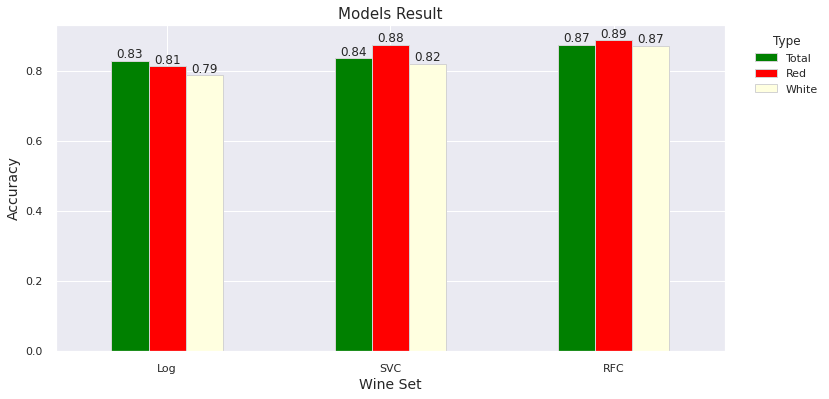

In [72]:
ax = df.plot(kind='bar', color = ['green', 'red', 'lightyellow'], edgecolor='lightgray' ,figsize = (12,6))

ax.set_title('Wine Modeling Result')
ax.set_xticklabels(['Log', 'SVC', 'RFC'], rotation=0)
ax.legend(title='Type', bbox_to_anchor= (1.03, 1))


for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.2f"%(height), (left+width/2, height*1.01), ha='center')

plt.title("Models Result", fontsize=15)
plt.xlabel("Wine Set", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

##6.Review

* What characteristics of wine are most closely related to wine quality?
> According to the correlation analysis, alcohol (positive), density (negative), volatile acidity (negative), and chlorides (negative) are related to wine quality. 
* Make a model that predicts wine quality.
> Red/white wine data were divided and analyzed, and the combined results were compared.
The results for the analysis set were different for each model, but overall, the prediction performance was the best when RFC was used.